## RESUME CATEGORIZATION

### Problem Statement

##### In today's competitive job market, hiring managers receive a multitude of resumes for each open position. Efficiently and accurately classifying these resumes into relevant job categories is a critical. However, manual classification is time-consuming and prone to errors. Leveraging machine learning and natural language processing (NLP) to automate resume classification can significantly enhance the efficiency and accuracy of the hiring process.

### Data Description

#### The dataset consist of two columns : category and resume.
* Category : This column contains job titles or categories into which resumes are classified. Each entry in this column represents a specific job role or title.
* Resume : This column contains the textual content of the resumes. Each entry is a detailed description of an individual's resume, including information such as work experience, educational background, skills, and other relevant details.
* Here , our taget column is category and on the basis of the resume input we will be predicting category.

### Import Libraries

##### The initial libraries have been called below , moving ahead the necessary libraries will be added as per the requirement. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading CSV Dataset 

In [2]:
resumeDF = pd.read_csv("UpdatedResumeDataSet.csv")

#### Printing first 5 rows

In [3]:
resumeDF.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#### Printing number of dimensions in the dataset

In [4]:
resumeDF.shape

(962, 2)

The dataset has 962 Records and 2 Features 

#### Printing value_counts() to have a better grasp of the dataset

In [5]:
resumeDF.value_counts()

Category         Resume                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

#### Returns the count of unique values in the 'Category' column

In [6]:
resumeDF['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

The Value Counts is returning the distribution of resume categories in the dataset.

1. **Category Distribution** : 
* The dataset contains resumes for 25 different job categories.

* "Java Developer" has the highest number of resumes (84), while "Advocate" has the fewest (20).

2. **Category Imbalance** :
* There is a noticeable imbalance in the number of resumes across different categories. Some categories, like "Java Developer" and "Testing," have significantly more resumes compared to others like "Advocate" and "Civil Engineer".This class imbalance can affect the performance of machine learning models, particularly those that rely on balanced data.


#### Returns unique values present in the 'Category' column

In [7]:
resumeDF["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

Here , we are checking for unique category values from the dataset to have a better grasp of dataset 

#### Printing summary statistics of the Dataframe

In [8]:
resumeDF.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


Insights:
1. **Count** :
* There are 962 resumes in the dataset.

2. **Unique** :
* There are 25 unique job categories in Category Column.
* There are 166 unique resumes in Resume Column.

3. **Top** :
* The most frequent job category is "Java Developer" 

4. **Frequency** :
* There are 84 resumes classified as "Java Developer"
* The most common resume description appears 18 times.

#### Printing a concise summary of DataFrame

In [9]:
resumeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


info :
* There are 962 non-null count for both the columns Category and Resume.
* Both the columns Category and Resume have the Data Type as Object.

#### Printing the data types of each column

In [10]:
resumeDF.dtypes

Category    object
Resume      object
dtype: object

#### Returning the total number of missing (null) values in each column

In [11]:
resumeDF.isnull().sum()

Category    0
Resume      0
dtype: int64

There are no null records in the dataset

#### Returning an Index object containing the column names

In [12]:
resumeDF.columns

Index(['Category', 'Resume'], dtype='object')

#### Printing the total number of duplicate rows

In [13]:
resumeDF.duplicated().sum()

796

## Exploratory Data Analysis

* EDA explores the relationships between variables, helping to understand how different features influence each other and the target variable.

#### Plotting a countplot showing the count of resumes in each category, with the figure size set to 8x7 inches

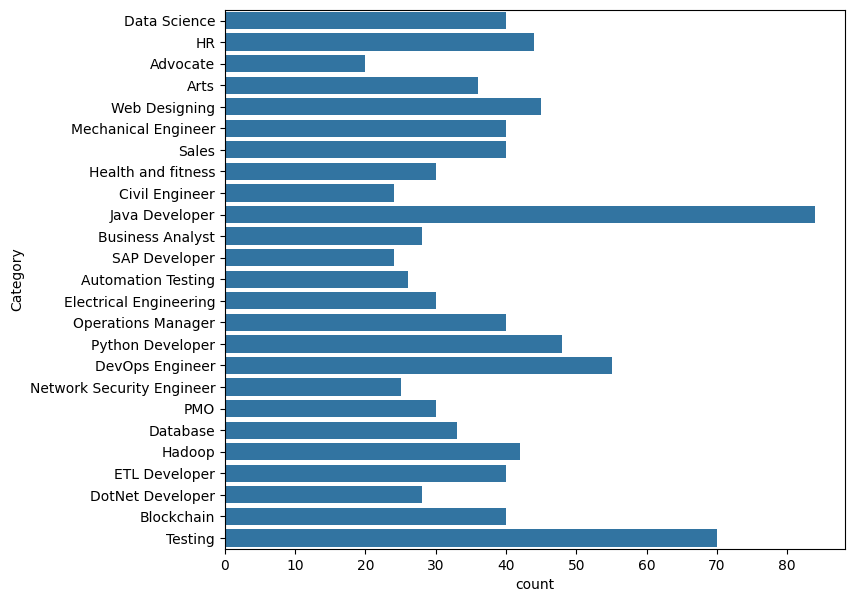

In [14]:
plt.figure(figsize=(8,7))
sns.countplot(resumeDF["Category"])
plt.show()

The graphical representation is showing the distribution of categories with respect to its count.
Even here we can see the imbalance of the categories where highest "Java Developer" reaching to 80 counts and least "Advocate" reaching to 20 counts. 

#### Plotting a pie chart showing the percentage distribution of resume categories

<Axes: ylabel='Percentage wise distrubution of Category'>

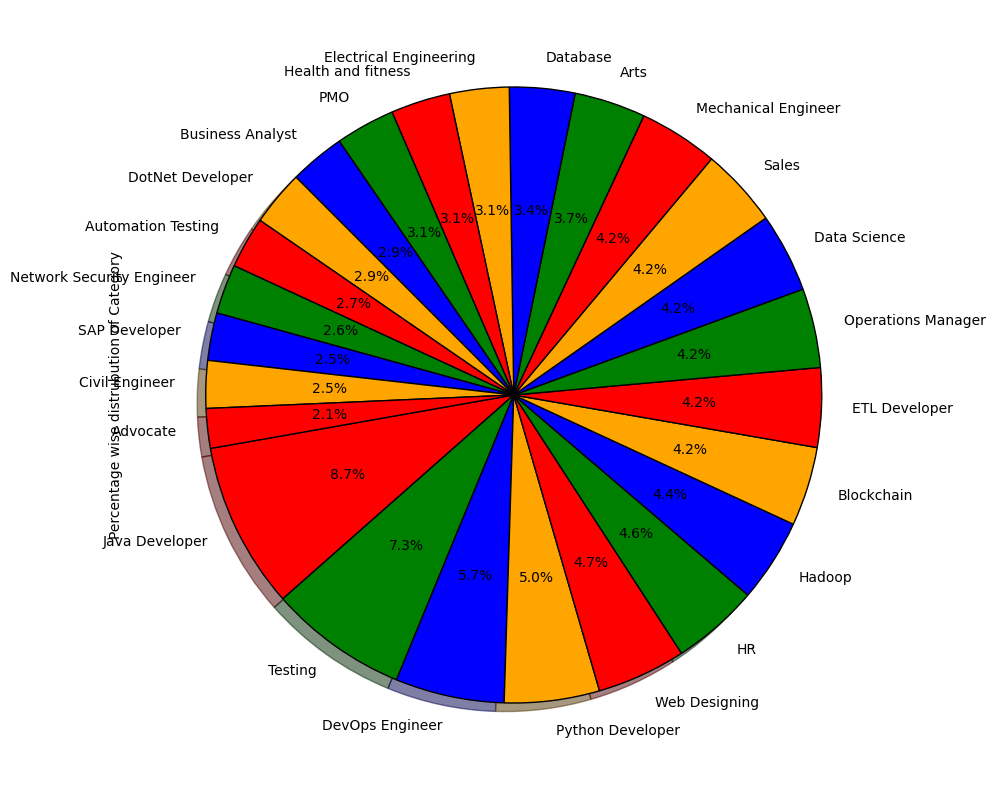

In [15]:
fig = plt.figure(figsize=(15,10))

colors = ("red","green","blue","orange")

wp = {"linewidth":1,"edgecolor":"black"}

tags = resumeDF["Category"].value_counts()/resumeDF.shape[0]

tags.plot(kind="pie",autopct = "%1.1f%%",shadow=True,colors=colors,
          startangle=190, wedgeprops = wp, label='Percentage wise distrubution of Category')

The pie chart represents the percentage distribution of each job categories.
Here , "Java Developer" has 8.7% with highest score whereas "Advocate" has 2.1% which is the least score and every other category lies in between with different percentages.

#### Plotting a bar plot showing the frequency distribution of categories in the "Category" column

C:\Users\Sambhu\AppData\Local\Temp\ipykernel_15248\1503818472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resumeDF["Category"].value_counts().index,


Text(0, 0.5, 'Frequency')

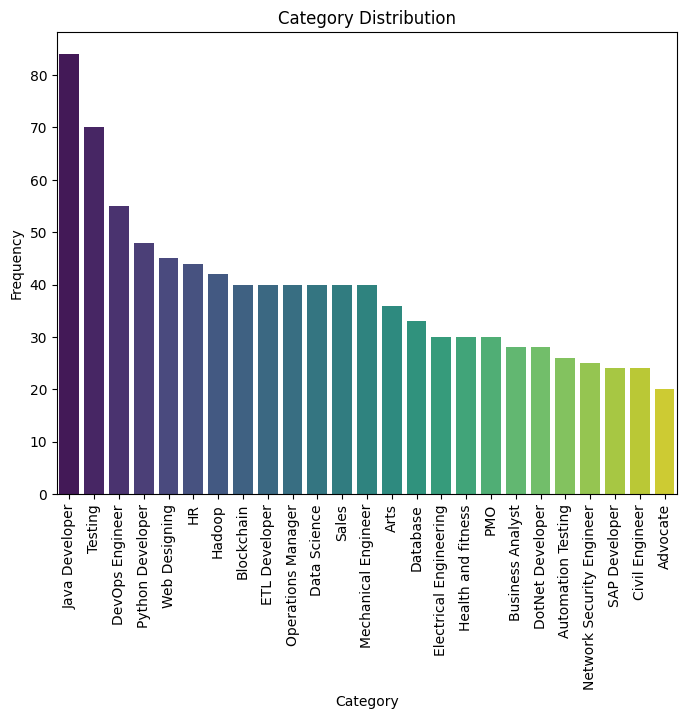

In [16]:

# Plot the distribution 
plt.figure(figsize=(8, 6)) 
sns.barplot(x=resumeDF["Category"].value_counts().index, 
            y=resumeDF["Category"].value_counts().values, 
            palette='viridis') 

plt.xticks(rotation=90)
plt.title('Category Distribution') 
plt.xlabel('Category') 
plt.ylabel('Frequency')

We have plotted a bar graph to represent the dataset distribution for the column category. Here , the X-Axis consist of Category and Y-Axis consist of Frequency of those categories. The highest occuring to least occuring frequencies have been plotted from left to right in the following bar graph. The graphical representation also helps us to understand the sheer imbalance is there in the dataset.

#### Using Beautiful Soup to remove html tags from the Resume Column

The dataset likely contains HTML content within the resume column that needs to be converted to plain text for further processing and analysis. 

#### Importing necessary libraries

In [17]:
import re
from bs4 import BeautifulSoup

In [18]:
# Function for removing HTML Tags
# Using Beautiful Soup
def htmlText(text):
    soup = BeautifulSoup(text,"lxml")
    return soup.get_text()

In [19]:
resumeDF['htmlTagsRemoved'] = resumeDF['Resume'].apply(htmlText)

In [20]:
resumeDF['htmlTagsRemoved'].head()

0    Skills * Programming Languages: Python (pandas...
1    Education Details \r\nMay 2013 to May 2017 B.E...
2    Areas of Interest Deep Learning, Control Syste...
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Education Details \r\n MCA   YMCAUST,  Faridab...
Name: htmlTagsRemoved, dtype: object

Removed HTML tags and retained only the meaningful text and stored it into a new columns "htmlTagsRemoved" within the dataset

#### Using regular expression to remove punctuation marks , links , hashtexts , special characters etc from the Resume columns

In [21]:
# Function for regularization of the text
def regData(text):
    regularLinkText = re.sub('http\S+\s',' ',text)
    regularHashText = re.sub('@\S+',' ',regularLinkText)
    regularMentionText = re.sub('#\S+',' ',regularHashText)
    regularSpecialText =  re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', regularMentionText)
    regularDiffText =  re.sub(r'[^\x00-\x7f]', ' ', regularSpecialText) 
    regularSpaceText = re.sub(r'\s+',' ',regularDiffText)
    return regularSpaceText


In [22]:
regData("my #### $ #  #hellowrold webiste this working http://heloword and access it @gmail.com")

'my webiste this working and access it '

In [23]:
resumeDF["htmlTagsRemoved"] = resumeDF["htmlTagsRemoved"].apply(lambda x: regData(x))

In [24]:
resumeDF["htmlTagsRemoved"]

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to accept the challenges Positive...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: htmlTagsRemoved, Length: 962, dtype: object

In [25]:
resumeDF["htmlTagsRemoved"][32]

'Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Mr Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Interpreters Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 B Tech Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEKSHA CENTER January 2013 Little Flower Public School August 2000 Manipal Academy of Higher DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHUSIAST Skill Details Data Analysis Exprience Less than 1 year months excel Exprience Less than 1 year mon

#### Label Encoder

Converting categorical labels (text or string values) into numerical values. This is a crucial step for preparing categorical data for machine learning algorithms, which typically require numerical inputs. 

In [26]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()

In [27]:
encoding.fit(resumeDF["Category"])
resumeDF["labelCategory"] = encoding.transform(resumeDF["Category"])

The categorical job titles in the Category column are being converted into numerical labels and stored in the labelCategory column.

In [28]:
resumeDF[["Category","labelCategory"]]

,Category,labelCategory
0,Data Science,6
1,Data Science,6
2,Data Science,6
3,Data Science,6
4,Data Science,6
...,...,...
957,Testing,23
958,Testing,23
959,Testing,23
960,Testing,23


In [29]:
uniqueCategoryLabels = resumeDF.groupby('Category')['labelCategory'].unique()

In [30]:
uniqueCategoryLabels

Category
Advocate                      [0]
Arts                          [1]
Automation Testing            [2]
Blockchain                    [3]
Business Analyst              [4]
Civil Engineer                [5]
Data Science                  [6]
Database                      [7]
DevOps Engineer               [8]
DotNet Developer              [9]
ETL Developer                [10]
Electrical Engineering       [11]
HR                           [12]
Hadoop                       [13]
Health and fitness           [14]
Java Developer               [15]
Mechanical Engineer          [16]
Network Security Engineer    [17]
Operations Manager           [18]
PMO                          [19]
Python Developer             [20]
SAP Developer                [21]
Sales                        [22]
Testing                      [23]
Web Designing                [24]
Name: labelCategory, dtype: object

For each job category, retrived unique labelCategory values and stored it into "uniqueCategoryLabels". This helps in understanding how many distinct labels exist within each job category.

#### Importing libraries for lemmatizing and stopwords 

In [31]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 

In [32]:
STOPWORDS = set(stopwords.words('english'))

In [33]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, resumeDF.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', resumeDF.iloc[i]['htmlTagsRemoved'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Cleaning the text data from resume column by normalizing and stemming the words to prepare them for further analysis or model training.

In [34]:
corpus[0:3]

['skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri machin learn regress svm na bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch js dc js plotli kibana matplotlib ggplot tableau other regular express html css angular logstash kafka python flask git docker comput vision open cv understand deep learn educ detail data scienc assur associ data scienc assur associ ernst young llp skill detail javascript exprienc month jqueri exprienc month python exprienc monthscompani detail compani ernst young llp descript fraud investig disput servic assur technolog assist review tar technolog assist review assist acceler review process run analyt gener report core member team help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topi

#### Vectorization

1. **Objective** :
* Converting text data into meaningful numerical features, making it easier to analyze and build machine learning models.

2. **TfidfVectorizer**:
* Using "TfidfVectorizer" to convert the collection text data into a matrix of TF-IDF features.

3. **Importance Weighting** : 
* Assigns higher weights to terms that are more relevant and less frequent, improving model performance.


Importing TfidfVectorizer library

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfIDF = TfidfVectorizer()

In [37]:
X = corpus
y = resumeDF["labelCategory"]

In [38]:
X_tfidf = tfIDF.fit_transform(X).toarray()

In [39]:
X_tfidf.shape , y.shape   

((962, 5162), (962,))

X_tfidf is a matrix with 962 rows and 5162 features (terms), while y is with 962 labels , corresponding to the number of resumes.

In [40]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
y

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: labelCategory, Length: 962, dtype: int32

#### Train Test Split

Spliting the dataset into training and testing sets, which is essential for evaluating the performance of machine learning models.

Importing train_test_split library 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train , X_test , y_train , y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((769, 5162), (193, 5162), (769,), (193,))

X_train has 769 samples with 5162 features each, X_test has 193 samples with 5162 features each, y_train has 769 labels, and y_test has 193 labels.

#### SMOTE

1. **Use Case** :
* It works by generating synthetic samples for the minority class rather than simply duplicating existing ones. This is achieved by creating new samples along the lines connecting minority class instances that are close to each other in the feature space. By doing so, it balances the dataset, helping machine learning models perform better on both majority and minority classes.

2. **Objective** :
* Our main objective by using SMOTE technique is to overcome the issue of data imbalance as we already witnessed earlier with the distribution of categorical features like "Java Developer" and "Advocate" to be very imbalanced with highest of 80 and lowest of 20 counts. Using graphical representation like bar graph ,pie graph ,count graph and others methods we got into this conclusion. 

Importing SMOTE library

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote = SMOTE(random_state=42)

In [47]:
X_train_SMOTE , y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [48]:
X_train_SMOTE.shape , y_train_SMOTE.shape

((1725, 5162), (1725,))

X_train_SMOTE has 1725 samples with 5162 features , y_train_SMOTE has 1725 samples.

### Logistic Regression

Logistic regression is widely used for binary classification and also can be used for multiclass classification. Using logistic regression here cause it is performing exceptionally well compared to other models.

Importing logistic regression , confusion_matrix , classification_report , accuracy_score and ConfusionMatrixDisplay libraries.

Importing libraries to conduct cross validation

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Initialize the logistic regression model
logREG = LogisticRegression( multi_class='multinomial' , max_iter=1000,solver='lbfgs')

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(logREG, X_train_SMOTE, y_train_SMOTE, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

c:\Users\Sambhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sambhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sambhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sambhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

Cross-Validation Scores: [0.99710145 0.99710145 1.         1.         1.        ]


In [50]:
logREG = LogisticRegression()
logREG.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [51]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [52]:
y_logREG_pred = logREG.predict(X_test)

In [53]:
print(accuracy_score(y_test,y_logREG_pred))

0.9948186528497409


After fiting and predicting , model got an accuracy score of 99.48%

### Confusion Matrix

The confusion matrix provides insights into true positives, true negatives, false positives, and false negatives, helping to understand how well the model distinguishes between different classes.

In [54]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_logREG_pred)

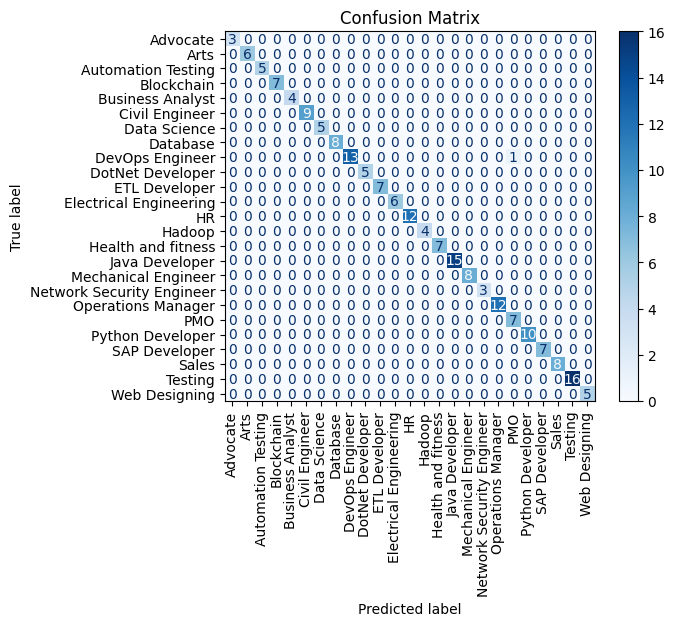

In [55]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=encoding.classes_)
cm_display.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix') 
plt.xticks(rotation=90)
plt.show()

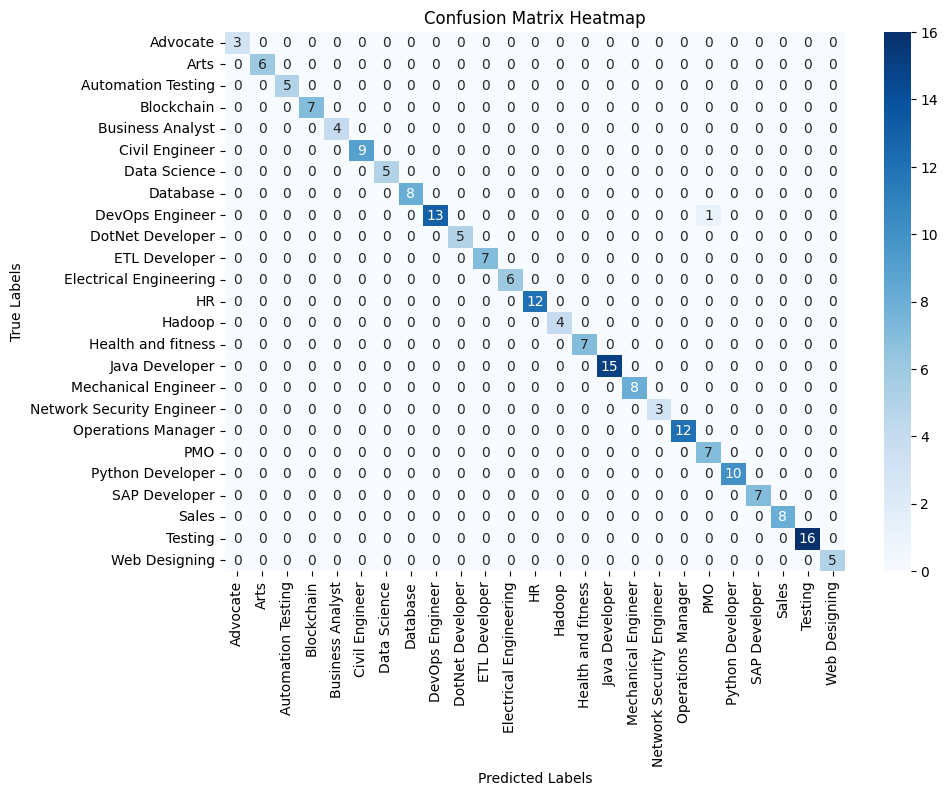

In [56]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoding.classes_, 
            yticklabels=encoding.classes_)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=90)
plt.show()


In [57]:
print("\n Classification report for classifier %s:\n%s\n" % (logREG, classification_report(y_test, y_logREG_pred)))


 Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1

### Classification Report Metrics:

**Macro Average**:
* **Precision (False Positives):**  
Precision is giving a value of 0.99. A value of 0.99 means that on average, the model's predictions are 99% precise, with very few false positives.

* **Recall (False Negatives):** 
Recall is giving a value of 1.00 . A value of 1.00 means that on average, the model is able to correctly identify all relevant data of each categories, with almost no false negatives.

* **F1-Score (Harmonic Mean):** 
The harmonic mean of precision and recall, averaged across all categories. A value of 1.00 indicates a perfect balance between precision and recall.


**Insights and Conclusions:**
* **High Performance:**
The high precision, recall, and F1-scores in both macro and weighted averages suggest that the model performs exceptionally well on the given dataset.


**Balanced Dataset:**
* The close alignment of macro and weighted averages (0.99 and 1.00 respectively) suggests that the categories in the dataset are likely well-balanced. 

**Minimal Errors:**
* Precision and recall values close to 1.00 imply that the model makes very few errors in predictions, with almost no false positives or false negatives.


**Model Robustness:**
* Such high scores generally indicate that the model is very robust and generalizes new , unseen data very well. However, it’s also essential to ensure these scores aren’t inflated due to overfitting, which can be checked with cross-validation.



#### **Model Evaluation and Observations**

* During my experiments with the model, I encountered scenarios that indicated potential overfitting. Specifically, when presented with garbage inputs or minimal/empty inputs, the model consistently predicted a default category. This behavior was observed across various machine learning models. However, logistic regression demonstrated a notable capability to accurately address and predict new inputs, effectively capturing the essence of the input data.

**Key Insights:**

* **Overfitting Concerns:** 
The model tends to overfit, as I have noticed by its behavior with garbage or empty inputs, defaulting to a specific category.

* **Model Consistency:** 
This default prediction pattern for garbage or empty inputs is common among different machine learning models that I have tested.

* **Logistic Regression Performance:** 
Despite the challenges, logistic regression stood out by precisely predicting new inputs and maintaining an ability to grasp the core content of the input. Whereas the other models in comparision were inaccurate with new inputs.


### Pickle

Importing pickle library

In [58]:
import pickle
pickle.dump(tfIDF,open('tfIDF.pkl','wb'))
pickle.dump(logREG, open('clfLR.pkl', 'wb'))
pickle.dump(encoding, open("encoderLabel.pkl",'wb'))

Created pickle files for TfidfVectorizer , Logistic Regression and Label Encoding

In [59]:
def pred(input_resume):
  
  corpus = []
  stemmer = PorterStemmer()
  review = re.sub('[^a-zA-Z]', ' ', input_resume)
  lowerReview = review.lower().split()
  review = [stemmer.stem(word) for word in lowerReview if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)
  
  vectorized_text = tfIDF.transform(corpus)

#  threshold = 0.078785
  threshold =  0.076788

  predicted_category = logREG.predict_proba(vectorized_text)
  max_proba = max(predicted_category[0]) 

  if input_resume.strip() == "":
    print("Error: Input is empty.")
  elif max_proba < threshold and len(input_resume) < 200 :
    print("Error: Low confidence in prediction. The input might be invalid with the following probability")
    return max_proba
  elif max_proba < threshold:
     return max_proba
  else:
      vectorized_text = vectorized_text.toarray()
      predicted_category = logREG.predict(vectorized_text)
      predicted_category_name = encoding.inverse_transform(predicted_category)
      print("Prediction:", predicted_category_name)
      return predicted_category_name[0] , max_proba
  

**Explanation** :
* Function pred() is processing and predicting the category of an input text. It stems and filters the text, transforms it using TF-IDF, and then uses logistic regression to predict the category. The function pred() includes checks for empty inputs and low-confidence predictions, and returns the predicted category along with the prediction probability if it meets the confidence threshold.

**Key steps:**

* **Preprocessing:** 
Cleans and stems the input text.

* **Vectorization:** 
Converts the text into TF-IDF vectors.

* **Prediction:** 
Uses logistic regression to predict the category.

* **Validation:** 
Checks for empty inputs and low-confidence predictions, ensuring reliable results.

Text Inputs

In [60]:
myresume1 = """ 

Job description
As part of our global expansion efforts, Onboard is actively scaling operations to over 20 countries and seeking to recruit merchants and liquidity providers worldwide. To support this mission, we are looking for Merchant Relations Advocates to serve as our first line of operational support in launch countries.
These advocates will play a crucial role in identifying ideal merchant candidates, maintaining strong relationships with them, and bridging communication gaps professionally and courteously.
The ideal Merchant Relations Advocate will be a member of the Onboard City Club, with deep knowledge of and influence within their local city or country.
Duties and Responsibilities
Identify and onboard potential merchants, such as high-value transaction (HVT) users or existing merchants from other platforms.
Serve as a liaison between local merchants and Onboard, ensuring effective communication.
Clearly communicate Key Performance Indicators (KPIs) related to Guaranteed Earnings to merchants and co-monitor their performance.
Provide support for merchant customer experience (CX) needs, helping to resolve issues and addressing concerns in a timely manner.
Qualifications and Requirements
Solid understanding of the crypto and digital asset industry within your city or country.
Prior Merchant experience on any p2p platform is preferred
Exceptional verbal and written communication skills in the local language.
Excellent customer service and interpersonal skills.
Strong organisational and coordination abilities.
Ability to collaborate effectively with a diverse and global team.

Benefits to you
Opportunity to do meaningful work
Part-time work with a fast-paced team and opportunity to join Onboard Global on Full full-time basis
Weekly internet allowance
Role: Operations - Other
Industry Type: IT Services & Consulting
Department: Customer Success, Service & Operations
Employment Type: Full Time, Permanent
Role Category: Operations
Education
UG: Any Graduate
PG: Any Postgraduate
Key Skills
operational supportInterpersonal skillsRelationshipAdvocateCustomer serviceCustomer experienceMonitoringRecruitment




"""

In [61]:
pred(myresume1)

Prediction: ['Advocate']


('Advocate', 0.07777138959652101)

for input text in myresume1 the model have returned a predicted category which is "Advocate" and predicted probability of 0.07777138959652101.

In [62]:
myresume2 = """ 

B.Sc. or M.sc Chemist / Chemical Fresher
Location :Surat / Navsari / Bharuch / Ahmedabad/ Vadodara
Salary : 15000 to 25000
Living + Travel Free
Chemical handling and disposal
Analyze retrieved data and prepare reports for laboratory management

Required Candidate profile

Lab work to develop and improve both new and existing chemical product
Assist with testing and calibrating lab equipment in preparation for specific tasks
Maintaining lab and operating lab equipment
Role: Chemist
Industry Type: Pharmaceutical & Life Sciences


""" 

Predicting the given input text by passing it into pred() function

In [63]:
pred(myresume2)

0.06260350795189341

for input text in myresume2 the model have returned a predicted probability of 0.06260350795189341.